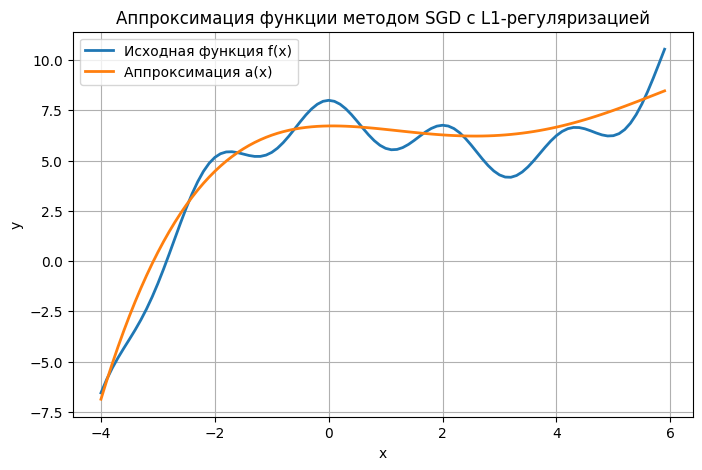

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7

# модель: полином степени N-1 с параметрами w
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])  # формируем вектор признаков [1, x, x^2, ..., x^(N-1)]
    return w.T @ xv                                 # скалярное произведение весов и признаков

# функция потерь: квадратичное отклонение модели от реальных данных
def loss(w, x, y):
    return (model(w, x) - y) ** 2

# градиент функции потерь по w
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])          # тот же вектор признаков
    return 2 * (model(w, x) - y) * xv                       # формула ∇L = 2*(ŷ - y)*xv

# обучающие данные
coord_x = np.arange(-4.0, 6.0, 0.1)     # точки на оси X
coord_y = func(coord_x)                 # значения функции в этих точках

# гиперпараметры
N = 5                                   # сложность модели (полином степени N-1)
lm_l1 = 2.0                             # коэффициент λ для L1-регуляризатора
sz = len(coord_x)                       # количество обучающих точек
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002])  # индивидуальные шаги обучения для каждого веса
w = np.zeros(N)                         # начальные веса модели = нули
n_iter = 500                            # число итераций SGD
lm = 0.02                               # λ для скользящего экспоненциального среднего
batch_size = 20                         # размер мини-батча

# начальное значение скользящего среднего потерь
Qe = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])

# фиксируем случайность для воспроизводимости
np.random.seed(0)

# -------- Основной цикл стохастического градиентного спуска -------- #
for i in range(n_iter):

    # случайная позиция для начала мини-батча
    k = np.random.randint(0, sz - batch_size - 1)
    
    # копия весов для регуляризации
    tilde_w = w.copy()
    tilde_w[0] = 0                      # смещение w0 не участвует в регуляризации
    
    grad_sum, loss_sum = 0, 0           # аккумуляторы для суммы градиентов и потерь
    
    # проходим по каждому элементу мини-батча
    for j in range(k, k+batch_size):
        grad_sum += dL(w, coord_x[j], coord_y[j])   # накапливаем градиент
        loss_sum += loss(w, coord_x[j], coord_y[j]) # накапливаем потери
        
    grad = grad_sum / batch_size        # усреднённый градиент
    Qk = loss_sum / batch_size          # усреднённая потеря
    
    # обновление скользящего среднего потерь
    Qe = lm * Qk + (1 - lm) * Qe        
    
    # обновление весов с учётом L1-регуляризации
    w = w - eta * (grad + lm_l1 * np.sign(tilde_w))
    
# финальное качество на обучающей выборке
Q = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])

# -------- Построение графика -------- #
plt.figure(figsize=(8, 5))
plt.plot(coord_x, coord_y, label="Исходная функция f(x)", linewidth=2)
plt.plot(coord_x, [model(w, x) for x in coord_x], label="Аппроксимация a(x)", linewidth=2)
plt.title("Аппроксимация функции методом SGD с L1-регуляризацией")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()